In [53]:
import numpy as np
import Loader
import Transformer
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('default')

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

In [3]:
#note loading data also shuffles order of the data
scaf = True
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0, scaffold=scaf)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0, scaffold=scaf)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0, scaffold=scaf) 
print(len(labelsTrain))

228


In [7]:

scaf = True
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0, scaffold=scaf)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0, scaffold=scaf)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0, scaffold=scaf) 

trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, 
                                                         compoundDataTest, compoundDataValidate, 
                                                         newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [12]:
def accuracyTypes(actual, model):
    totalPos = len(actual[actual == 1])
    totalNeg = len(actual[actual == 0])
    
    truePos = np.sum(model[actual == 1])
    falsePos = np.sum(model[actual == 0])
    trueNeg = totalNeg - falsePos
    falseNeg = totalPos - truePos
    
    return truePos/totalPos, falseNeg/totalPos, trueNeg/totalNeg, falsePos/totalNeg
    

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score

maxC = 1

classWeights = {0:.7, 1:.3}

clf=svm.SVC(
    C=maxC,                          # The regularization parameter (default 1)
    kernel='rbf',                   # The kernel type used (RBF: Gaussian Kernel Radial Basis Function)
    degree=1,                       # Degree of polynomial function (ONLY relevant for kernel="poly")
    gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.00001,                    # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=classWeights,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter= -1,                   # Hard limit on iterations (-1 is no limit)
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one (this don't matter)
    break_ties=False,               # How to handle breaking ties
    random_state=None               # Random state of the model
)

#dataFrame = pd.DataFrame(trainDataPCA)
#dataFrame['labels'] = classTrain

#samp = int(len(df)*percent)
#df = df.sample(n = samp)
#print(len(df))
#Ytrain = df['labels']
#del df['labels']
#Xtrain = df.values

#train model
clf.fit(trainData, trainClass)

trainPred = clf.predict(trainData)
valPred = clf.predict(valData)
testPred = clf.predict(testData)
print("Ein Acc: ", accuracy_score(trainClass, trainPred))
print("Eval Acc: ", accuracy_score(valClass, valPred))
print("Etest Acc: ", accuracy_score(testClass, testPred)) #DO NOT Run this often
#Ein Acc:  0.9642988590357011
#Eval Acc:  0.9147058823529411
#.9323529411764706

print()

#random: 
#Ein Acc:  0.9988958410011042
#Eval Acc:  0.9323529411764706
#Etest Acc:  0.9470588235294117
#scaffold:
#Ein Acc:  0.9977916820022084
#Eval Acc:  0.9294117647058824
#Etest Acc:  0.8941176470588236

Ein Acc:  0.9260213470739787
Eval Acc:  0.9
Etest Acc:  0.9058823529411765



In [78]:
print("\t true positive", "\t       false negative", "\t    true negative", "    false positive")
print("Train:", accuracyTypes(trainClass, trainPred))
print("Val:  ", accuracyTypes(valClass, valPred))
print("Test: ", accuracyTypes(testClass, testPred))

	 true positive 	       false negative 	    true negative     false positive
Train: (0.9011469142545058, 0.09885308574549427, 0.9774266365688488, 0.022573363431151242)
Val:   (0.7891156462585034, 0.2108843537414966, 0.9844559585492227, 0.015544041450777202)
Test:  (0.7603305785123967, 0.2396694214876033, 0.9863013698630136, 0.0136986301369863)


In [27]:
def runModel(classWeights, maxC):
    clf=svm.SVC(
        C=maxC,                          # The regularization parameter (default 1)
        kernel='rbf',                   # The kernel type used (RBF: Gaussian Kernel Radial Basis Function)
        degree=1,                       # Degree of polynomial function (ONLY relevant for kernel="poly")
        gamma='scale',                  # The kernel coefficient
        coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
        shrinking=True,                 # To use shrinking heuristic
        probability=False,              # Enable probability estimates
        tol=0.00001,                    # Stopping crierion
        cache_size=200,                 # Size of kernel cache
        class_weight=classWeights,              # The weight of each class
        verbose=False,                  # Enable verbose output
        max_iter= -1,                   # Hard limit on iterations (-1 is no limit)
        decision_function_shape='ovr',  # One-vs-rest or one-vs-one (this don't matter)
        break_ties=False,               # How to handle breaking ties
        random_state=None               # Random state of the model
    )
    clf.fit(trainData, trainClass)

    trainPred = clf.predict(trainData)
    valPred = clf.predict(valData)
    testPred = clf.predict(testData)
    return clf, trainPred, valPred, testPred

In [55]:
weight0 = np.arange(0,1,.02)
recall = [[],[],[]] #train, val, test
precision = [[],[],[]]

for w in weight0:
    classWeights = {0:w, 1:1.0-w}
    clf, trainPred, valPred, testPred = runModel(classWeights, 1)
    trPos, flNeg, trNeg, flPos = accuracyTypes(trainClass, trainPred)
    precision[0].append(trPos/(trPos+flPos))
    recall[0].append(trPos/(trPos+flNeg))
    trPos, flNeg, trNeg, flPos = accuracyTypes(valClass, valPred)
    precision[1].append(trPos/(trPos+flPos))
    recall[1].append(trPos/(trPos+flNeg))
    trPos, flNeg, trNeg, flPos = accuracyTypes(testClass, testPred)
    precision[2].append(trPos/(trPos+flPos))
    recall[2].append(trPos/(trPos+flNeg))
    print(w)

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78
0.8
0.8200000000000001
0.84
0.86
0.88
0.9
0.92
0.9400000000000001
0.96
0.98


Text(0, 0.5, 'Precision')

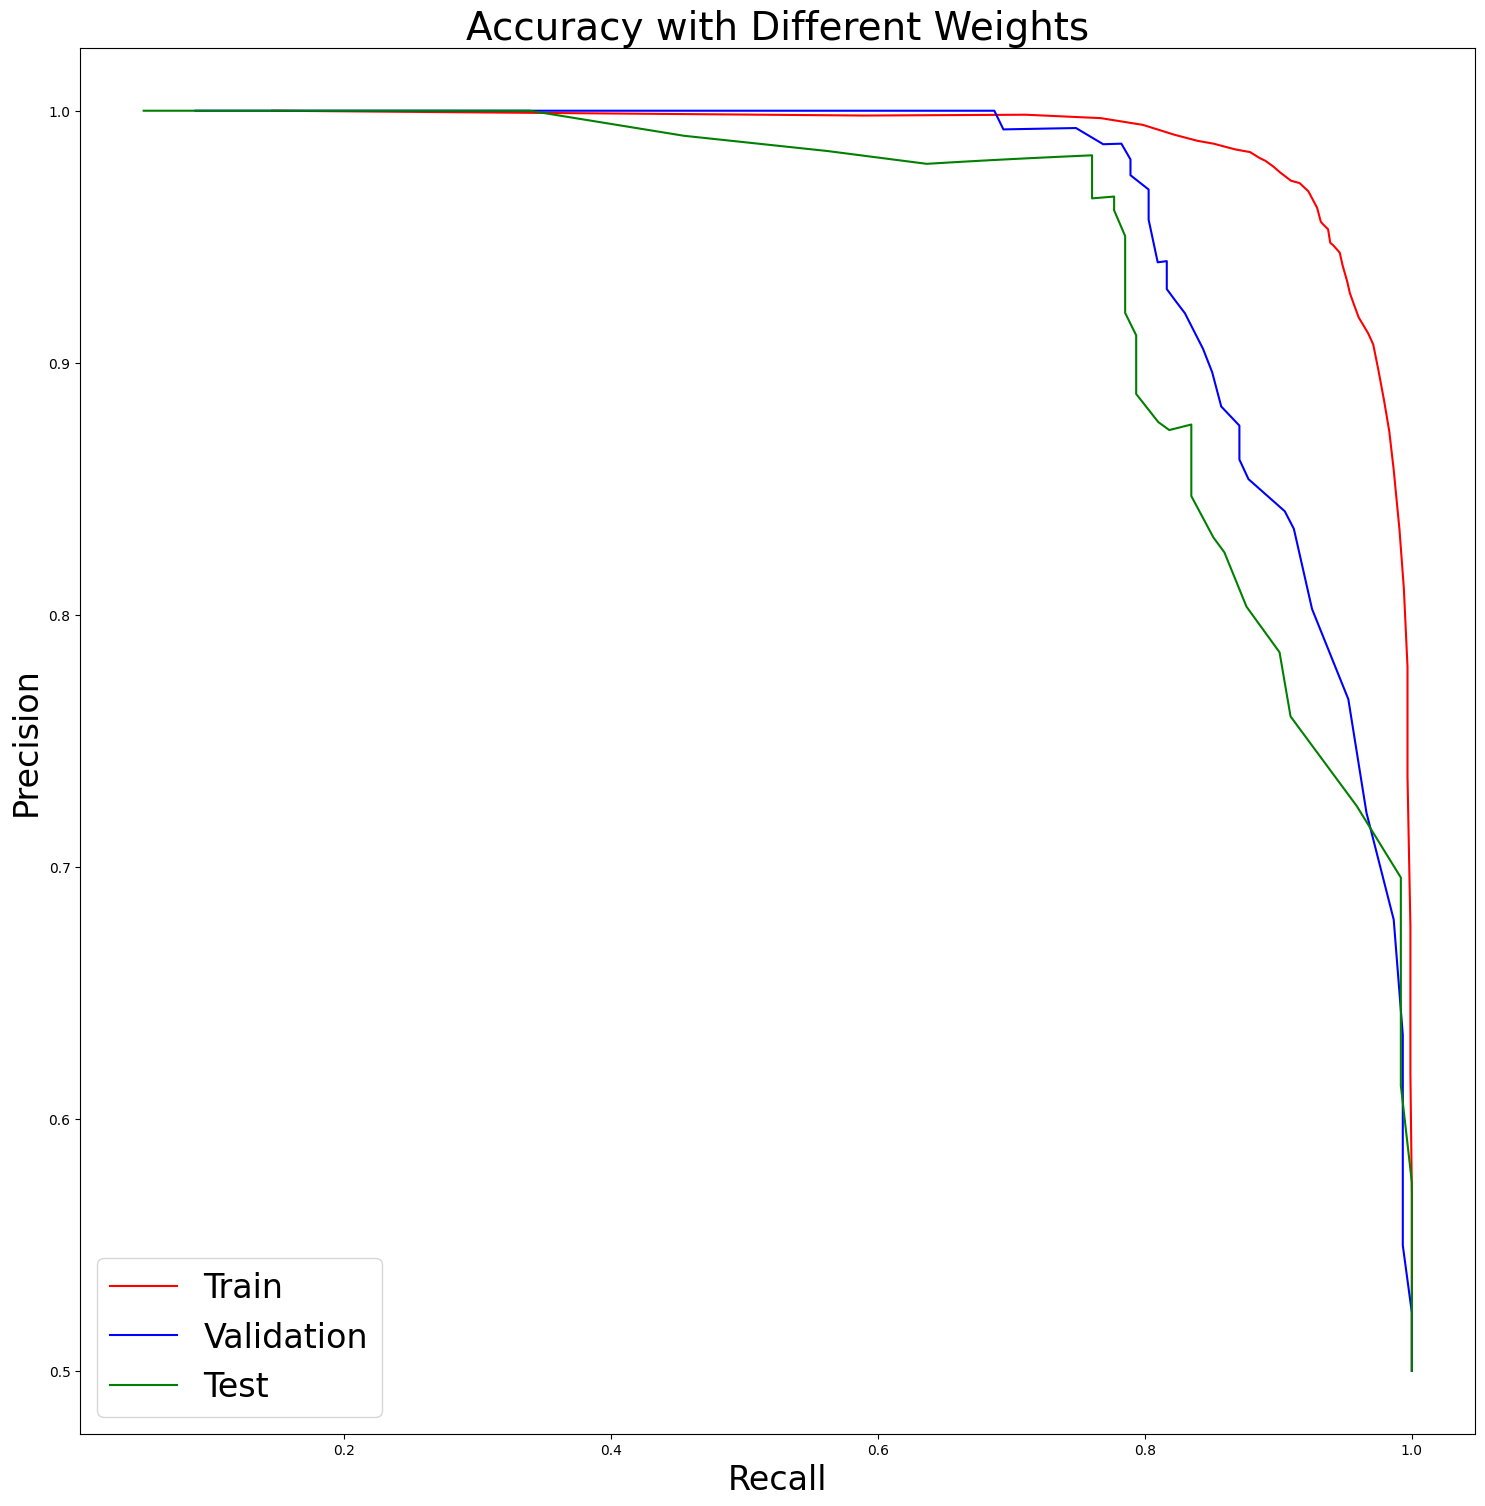

In [56]:
fig, ax = plt.subplots(figsize=(18,18))
ax.plot(recall[0], precision[0], color="red", label="Train")
ax.plot(recall[1], precision[1], color="blue", label="Validation")
ax.plot(recall[2], precision[2], color="green", label="Test")

ax.legend(loc="lower left", fontsize=24)

ax.set_title("Accuracy with Different Weights", fontsize=28)
ax.set_xlabel("Recall", fontsize=24)
ax.set_ylabel("Precision", fontsize=24)

#ax[i].set_ylim([0,1])